In [1]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install yfinance
import yfinance as yf

In [3]:
start='2012-01-01'
end='2023-11-15'

stock='GOOG'

df=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.reset_index(inplace=True)

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2982,2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
2983,2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500
2984,2023-11-10,131.529999,134.270004,130.869995,134.059998,134.059998,20872900
2985,2023-11-13,133.360001,134.110001,132.770004,133.639999,133.639999,16409900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2987 non-null   datetime64[ns]
 1   Open       2987 non-null   float64       
 2   High       2987 non-null   float64       
 3   Low        2987 non-null   float64       
 4   Close      2987 non-null   float64       
 5   Adj Close  2987 non-null   float64       
 6   Volume     2987 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 163.5 KB


In [7]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2987,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2.987000e+03
mean,2017-12-09 06:04:27.559424256,59.897526,60.529211,59.303615,59.929853,59.929853,4.404813e+07
min,2012-01-03 00:00:00,13.956189,14.060299,13.861045,13.924059,13.924059,1.584340e+05
25%,2014-12-20 12:00:00,28.095613,28.323695,27.848260,28.020022,28.020022,2.427100e+07
50%,2017-12-07 00:00:00,51.021500,51.712002,50.521000,51.070499,51.070499,3.185800e+07
75%,2020-11-24 12:00:00,86.924000,88.210499,86.272751,87.014252,87.014252,5.132352e+07
max,2023-11-14 00:00:00,151.863495,152.100006,149.887497,150.709000,150.709000,4.995615e+08
std,NaN,38.225442,38.693177,37.806240,38.250637,38.250637,3.517540e+07


In [8]:
df.shape

(2987, 7)

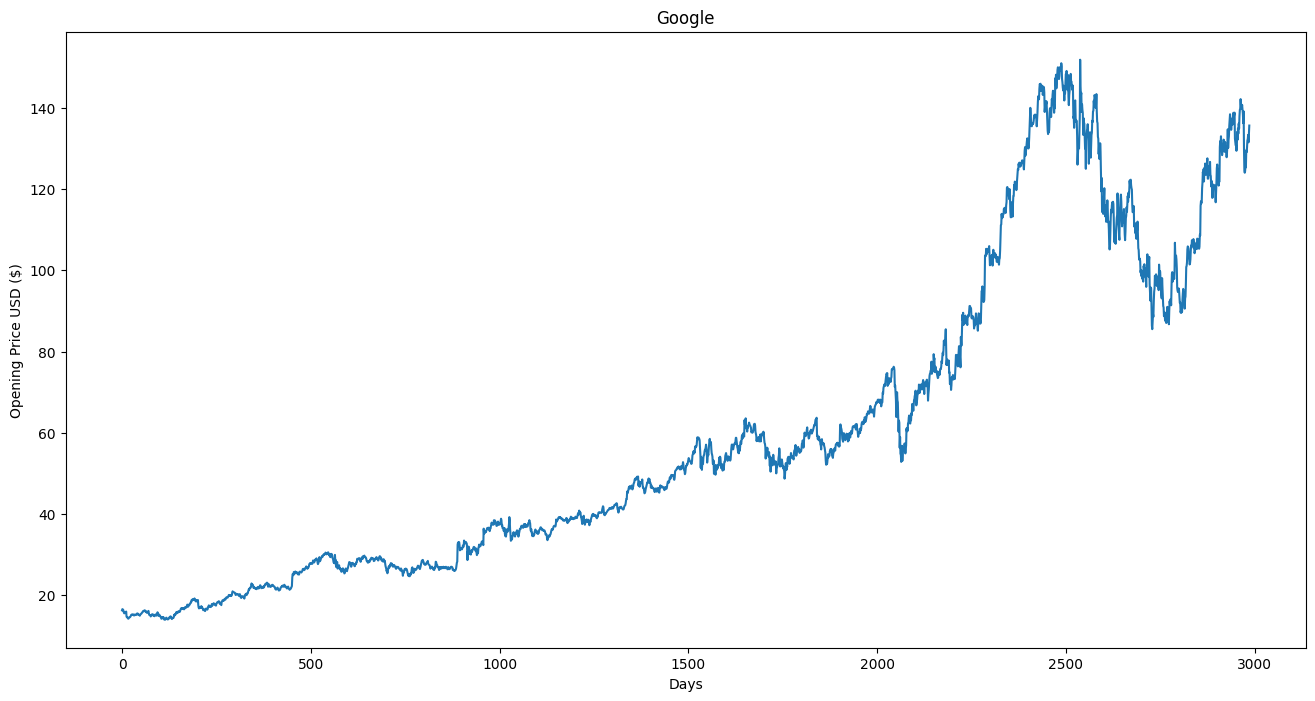

In [9]:
#EDA

# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['Open'])
plt.show()

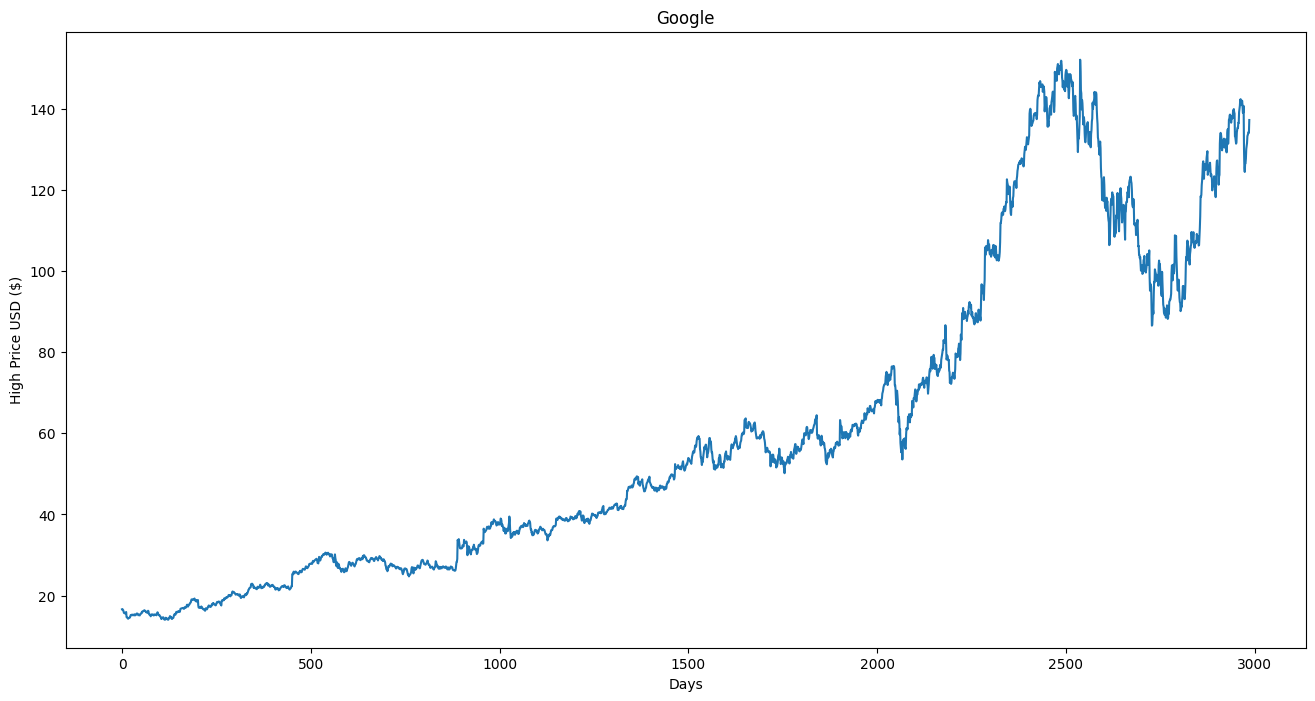

In [10]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

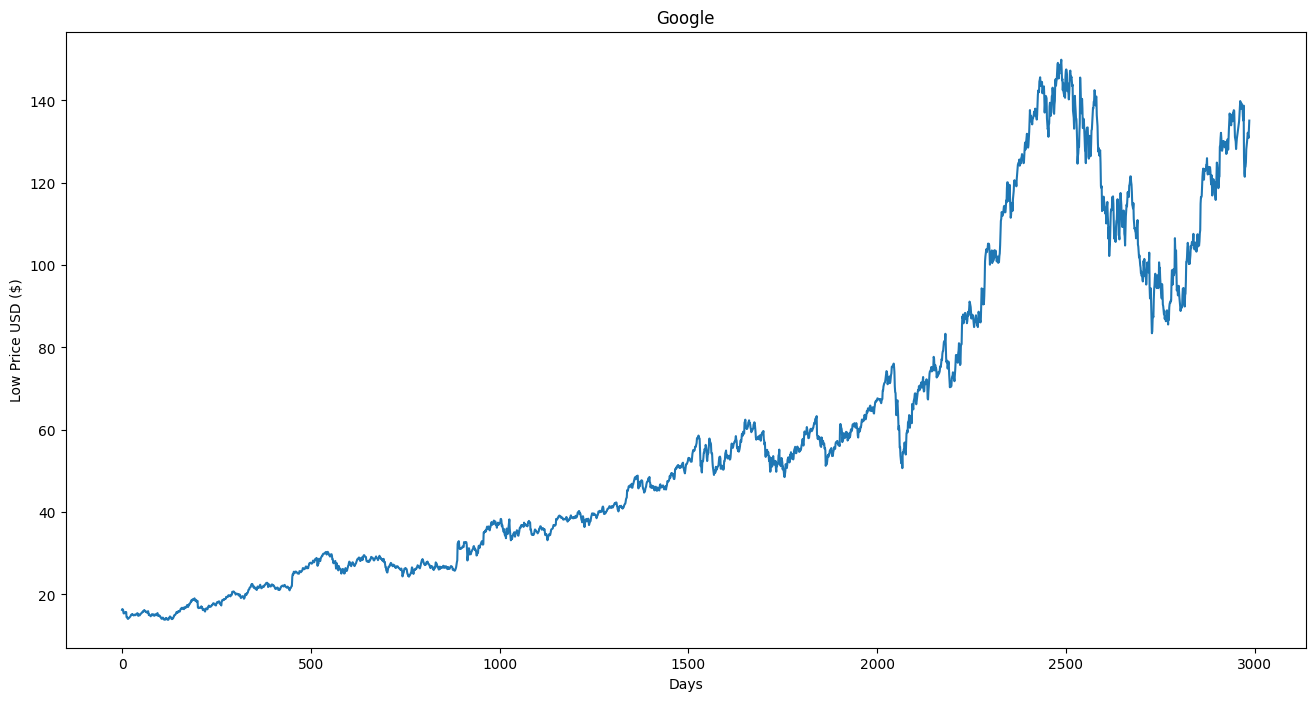

In [11]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

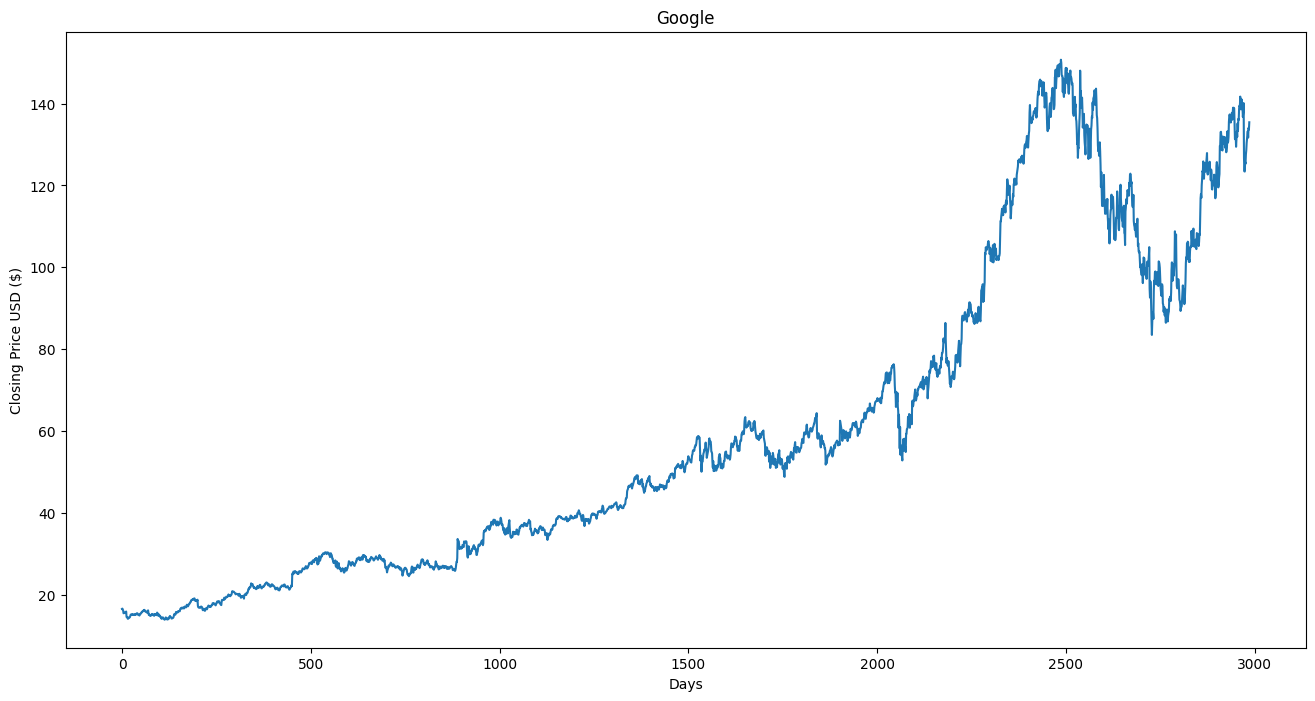

In [12]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [13]:
df2 = df['Close']

In [14]:
df2.tail()

2982    133.259995
2983    131.690002
2984    134.059998
2985    133.639999
2986    135.429993
Name: Close, dtype: float64

In [15]:
df2 = pd.DataFrame(df2)

In [16]:
df2.tail()

,Close
2982,133.259995
2983,131.690002
2984,134.059998
2985,133.639999
2986,135.429993


In [17]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [18]:
df2.tail()

,Close,Prediction
2982,133.259995,NaN
2983,131.690002,NaN
2984,134.059998,NaN
2985,133.639999,NaN
2986,135.429993,NaN


In [19]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[ 16.57312965]
 [ 16.64461136]
 [ 16.41372681]
 ...
 [121.26000214]
 [123.87000275]
 [123.01999664]]


In [20]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 14.73302746  14.80301476  14.65083504 ... 134.05999756 133.63999939
 135.42999268]


In [21]:
#LINEAR AND DECISION TREE REGRESSION
# 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import joblib

In [23]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [24]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 99.87000275],
       [101.43000031],
       [108.80000305],
       [105.22000122],
       [103.47000122],
       [108.04000092],
       [100.        ],
       [ 95.45999908],
       [ 94.86000061],
       [ 95.        ],
       [ 94.94999695],
       [ 97.09999847],
       [ 95.77999878],
       [ 94.58999634],
       [ 92.05000305],
       [ 91.80000305],
       [ 91.06999969],
       [ 89.34999847],
       [ 90.09999847],
       [ 90.30000305],
       [ 90.51000214],
       [ 92.30999756],
       [ 94.01999664],
       [ 95.58000183],
       [ 94.16999817],
       [ 94.65000153],
       [ 92.66000366],
       [ 91.01000214],
       [ 91.66000366],
       [ 94.25      ],
       [ 96.55000305],
       [101.06999969],
       [102.45999908],
       [101.93000031],
       [105.83999634],
       [104.22000122],
       [106.26000214],
       [106.05999756],
       [103.05999756],
       [101.36000061],
       [101.90000153],
       [101.31999969],
       [104.        ],
       [104

In [25]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[113.39999771 119.01000214 136.92999268 131.46000671 120.97000122
 135.16999817  94.94999695 120.93000031 120.13999939 116.87000275
 117.70999908 119.62000275 124.83000183 125.69999695 125.05999756
 124.08000183 122.77999878 126.62999725 120.30999756 121.87999725
 122.79000092 127.91000366 129.86999512 133.00999451 121.00500107
 131.88999939 128.63999939 128.77000427 128.53999329 131.94000244
 131.83999634 130.1499939  130.21000671 130.16999817 101.38999939
 128.71899414 133.13000488 130.46000671 128.11000061 128.92999268
 129.69000244 133.21000671 133.32850647 130.69000244 131.78999329
 135.49000549 136.92999268 137.3500061  129.44999695 131.46000671
 135.36999512 136.19999695 137.19999695 131.78999329 136.07000732
 137.5        137.5        138.30000305 138.0019989  138.0019989
 134.58999634 131.36000061 131.25       132.16999817 129.44999695
 131.46000671 133.13000488 131.36000061 135.16999817 133.30000305
 136.27000427 141.50100708 138.72999573 139.5        139.19999695
 141.699996

In [26]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[103.48630607 105.03075613 112.32730679 108.78298454 107.05042567
 111.5748791  103.61500772  99.12025409  98.52623541  98.66483952
  98.61533481 100.74390865  99.43706455  98.2589221   95.7442433
  95.49673489  94.77400701  93.07114793  93.81367316  94.01168442
  94.21959058  96.00164661  97.69460323  99.23906084  97.84310978
  98.31832925  96.34816442  94.7146074   95.35813078  97.92231429
 100.19939468 104.67434342 106.05048957 105.52577295 109.39680056
 107.7929509  109.81262043 109.61460917 106.64450825 104.96145408
 105.49607315 104.92185183 107.57514229 108.47607653 108.68398268
 108.51567122 112.42630864 110.49573851 109.67401633 108.78298454
 111.72338566 112.98072506 109.97102189 108.68398268 108.58497328
 109.45620772 109.46611017 110.3274346  108.17906341 108.0206544
 111.90159202 111.75308546 111.24816619 109.53541222 109.67401633
 108.77308209 109.76806318 111.77288281 111.47587725 115.77261963
 120.34657777 121.35640876 120.40597737 123.50477995 124.88093366
 126.9005956

In [27]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\Lovkush\AppData\Local\Temp\ipykernel_19292\1911164318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


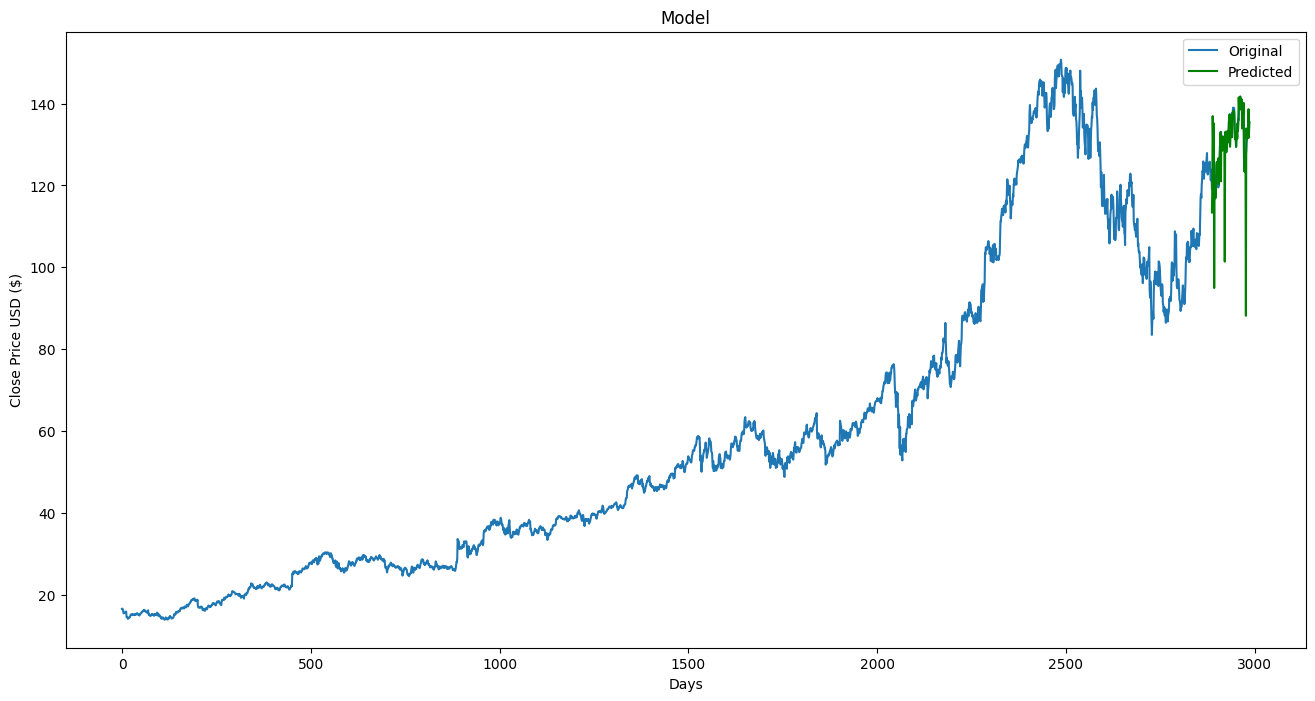

In [31]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid['Predictions'],'g')
plt.legend(["Original", 'Predicted'])
plt.show()

In [29]:
joblib.dump(tree, 'decision_tree_model.joblib')

['decision_tree_model.joblib']